# Инструкция по выполнению проекта:

Мы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев наш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Нам нужно разобраться в причинах этой ситуации.

У нас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Нам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

# Шаг 1. Загрузим данные и подготовим их к анализу
Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедимя, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
# Шаг 2. Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии


# Шаг 3. Проведем исследовательский анализ данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

# Шаг 4. Маркетинг
Выясним:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

# Шаг 5. Оценим окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

Опишем проблемы, которые мы обнаружили. Ответим на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишем возможные причины обнаруженных проблем и сформируем рекомендации для рекламного отдела. При решении этого шага считаем, что мы смотрим данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

# Шаг 6. Выводы
- Выделим причины неэффективности привлечения пользователей;
- Сформируем рекомендации для отдела маркетинга для повышения эффективности.

# Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

## Загрузим данные и подготовим их к анализу
Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедимся, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

### Ознакомление с данными

In [1]:
# импортируем все необходимые в будущем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st 
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
# считываем и записываем в переменные предоставленные дата сеты

visits_info = pd.read_csv('/datasets/visits_info_short.csv')
orders_info = pd.read_csv('/datasets/orders_info_short.csv')
costs_info = pd.read_csv('/datasets/costs_info.csv')

In [3]:
# выводим информацию каждого датасета для ознакомления

display(visits_info.info())

display(orders_info.info())

display(costs_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

In [4]:
# выводим первые 10 строк каждого датасета для ознакомления

display(visits_info.head(10))

display(orders_info.head(10))

display(costs_info.head(10))

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


На первый взгляд данные имеют удовлетворительный вид. Однако столбцы необходимо переименовать в стандартный вид, а тип данных столбцов с датами изменить на `datetime`

### Подготовка данных к анализу

In [5]:
# приводим во всех таблицах названия столбцов к нижнему регистру

visits_info.columns = visits_info.columns.str.lower()

orders_info.columns = orders_info.columns.str.lower()

costs_info.columns = costs_info.columns.str.lower()

In [6]:
# приведём название столбцов к стандартизированному виду

visits_info = visits_info.rename(columns={
    'user id': 'user_id',
    'session start': 'session_start',
    'session end': 'session_end'
}
                  )

orders_info = orders_info.rename(columns={
    'user id': 'user_id',
    'event dt': 'event_dt'
}
                  )

In [7]:
# изменим тип данных в столбцах с датами

visits_info['session_start'] = pd.to_datetime(visits_info['session_start'])
visits_info['session_end'] = pd.to_datetime(visits_info['session_end'])

orders_info['event_dt'] = pd.to_datetime(orders_info['event_dt'])

costs_info['dt'] = pd.to_datetime(costs_info['dt'])

In [8]:
# проверим корректность исправлений

visits_info.info()

orders_info.info()

costs_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

### Проверка на дубликаты и пропуски

Проверим каждый из датасетов на наличие дубликатов и пропусков.

In [9]:
visits_info.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [10]:
orders_info.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [11]:
costs_info.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

Как можем заметить, во всех датасетах пропуски отсутствуют.

In [12]:
visits_info.duplicated().sum()

0

In [13]:
orders_info.duplicated().sum()

0

In [14]:
visits_info.duplicated().sum()

0

Как можем заметить, все данные чистые и подготовленные к анализу.

## Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии

Воспользуемся готовыми функциями из теоретических уроков и адаптируем их под работу с предоставленными датасетами

Для начала подготовим данные. Рассчитаем даты первого посещения и прочие данные, необходимые для рассчета продуктовых метрик.

In [15]:
# используем функцию для получения профилей с данными о первых посещениях

def get_profiles(sessions, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.normalize()
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

### Функция рассчета удержания

In [16]:
# функция для рассчета удержания:
#   profiles — профили пользователей,
#   sessions — данные журнала сессий,
#   observation_date — момент анализа,
#   horizon_days — горизонт анализа в днях,
#   dimensions - параметр по которому формируются когорты
#   ignore_horizon — опция «игнорировать горизонт анализа», по умолчанию False.

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[], 
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    # новый вариант с dimensions
    result_grouped = result_raw.pivot_table(
        index=dimensions,  # заменили dt
        columns='lifetime',
        values='user_id',
        aggfunc='nunique',
    )
    cohort_sizes = (
        result_raw.groupby(dimensions)  # заменили dt
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'  # заменили dt
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

### Функция рассчета конверсии

In [17]:
def get_conversion(
    profiles,
    purchases,  # заменили sessions
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Шаг 1. Получить пользовательские профили и данные о покупках
    # передаём их в качестве аргументов profiles и purchases

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Найти дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # Шаг 3. Добавить данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # Шаг 4. Рассчитать лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 5. Построить таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )

        # Шаг 6. Посчитать сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)

        # Шаг 7. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 8. Объединить таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 9. Разделить каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)

        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция рассчета LTV и ROI

In [18]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

## Проведём исследовательский анализ данных

Построем профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

### Создаём пользовательские профили. Выясняем минимальную и максимальную даты привлечения

In [19]:
# с помощью функции создаём пользовательские профили

profiles = get_profiles(visits_info, orders_info, costs_info)

profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [20]:
# получаем минимальную и максимальную даты привлечения

print('Минимальная дата привлечения пользователя:', profiles['first_ts'].min())

print(' ')

print('Максимальная дата привлечения пользователя:', profiles['first_ts'].max())

Минимальная дата привлечения пользователя: 2019-05-01 00:00:41
 
Максимальная дата привлечения пользователя: 2019-10-27 23:59:04


### Распределение привлечённых пользователей по странам

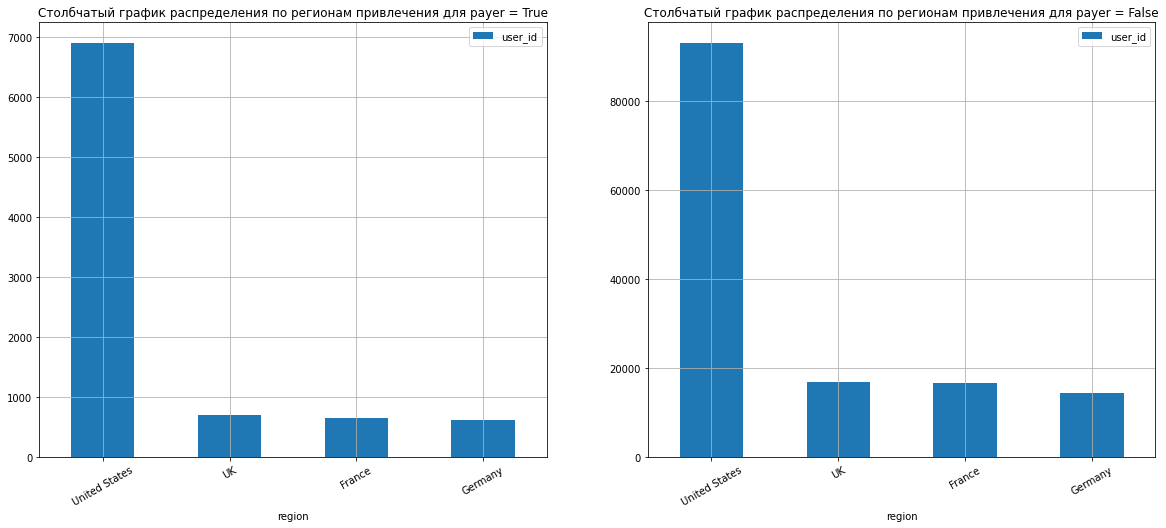

In [21]:
# построим график распределения привлечённых пользователей
# по странам. Для сравнения, построим два графика с различием 
# в наличие факта покупки у пользователей

for i, payer in enumerate(profiles['payer'].unique()):
    (
        profiles
        .query('payer == @payer')
        .pivot_table(index = 'region', values = 'user_id', aggfunc = 'count')
        .sort_values(by='user_id', ascending=False)
        .plot.bar(
            grid=True,
            figsize=(20, 8),
            rot=30,
            ax=plt.subplot(1, 2, i + 1)
        )
    )
    plt.title('Столбчатый график распределения по регионам привлечения для payer = {}'.format(payer))

In [22]:
# создаём сводную таблицу с отображением общего кол-ва 
# привлечённых пользователей по регионам и доли платящих пользователей

region_division = profiles.pivot_table(index='region', values='user_id', aggfunc='count')
region_division['payer_part'] = (
    (profiles.query('payer == True').pivot_table(index='region', values='user_id', aggfunc='count')['user_id'])
    /
    (region_division['user_id'])
)
region_division = region_division.sort_values(by='user_id', ascending=False)

region_division

,user_id,payer_part
region,,
United States,100002,0.069019
UK,17575,0.039829
France,17450,0.037994
Germany,14981,0.041119


В обоих случаем доминирующим регионом является США. Остальные три региона: `Великобритания`, `Франция` и `Германия` в сумме привлекают около `30%` пользовательского трафика.

По доле платящих пользователей США опережает остальные региона почти в 2 раза с долей в, почти, `7%`.

### Распределение привлечённых пользователей по устройствам

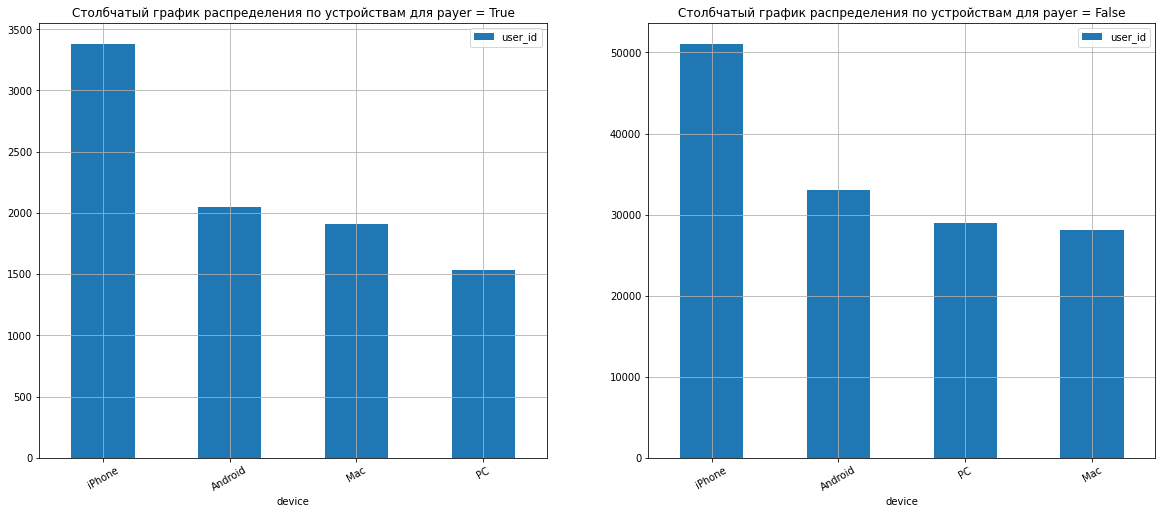

In [23]:
# построим график распределения привлечённых пользователей
# по устройствам. Для сравнения, построим два графика с различием 
# в наличие факта покупки у пользователей

for i, payer in enumerate(profiles['payer'].unique()):
    (
        profiles
        .query('payer == @payer')
        .pivot_table(index = 'device', values = 'user_id', aggfunc = 'count')
        .sort_values(by='user_id', ascending=False)
        .plot.bar(
            grid=True,
            figsize=(20, 8),
            rot=30,
            ax=plt.subplot(1, 2, i + 1)
        )
    )
    plt.title('Столбчатый график распределения по устройствам для payer = {}'.format(payer))

In [24]:
# создаём сводную таблицу с отображением общего кол-ва 
# привлечённых пользователей по устройствам и доли платящих пользователей

device_division = profiles.pivot_table(index='device', values='user_id', aggfunc='count')
device_division['payer_part'] = (
    (profiles.query('payer == True').pivot_table(index='device', values='user_id', aggfunc='count')['user_id'])
    /
    (device_division['user_id'])
)
device_division = device_division.sort_values(by='user_id', ascending=False)

device_division

,user_id,payer_part
device,,
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468
Mac,30042,0.063644


Порядка трети пользовательского трафика в обоих случаях привлекается с `iPhone`.

Однако доли платящих пользователей на всех платформах примерно равен.

### Распределение привлечённых пользователей по рекламным каналам

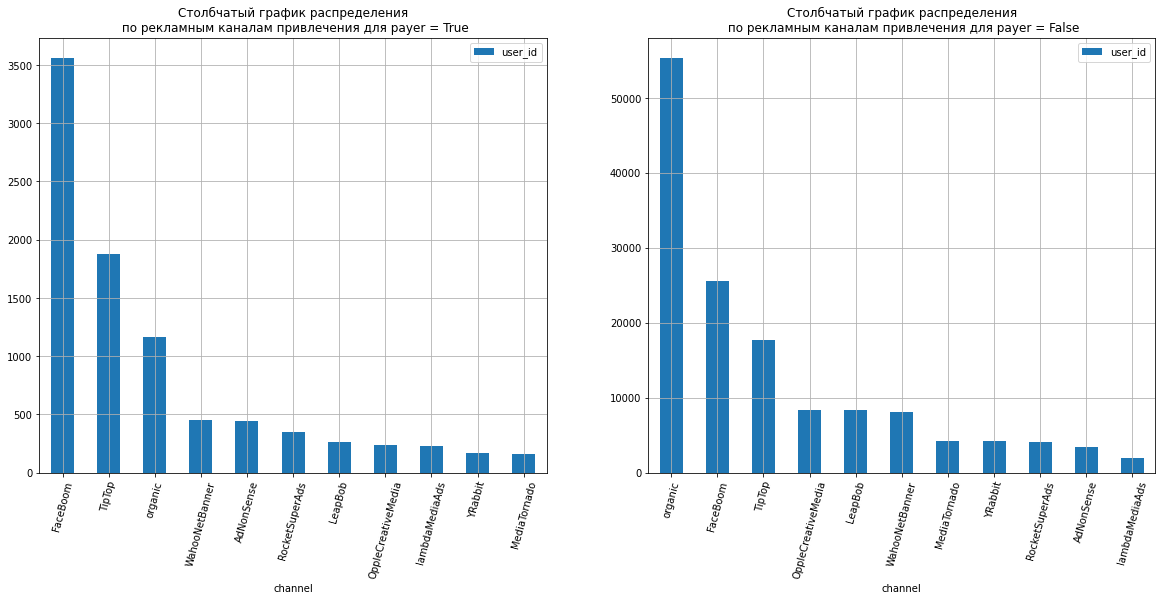

In [25]:
# построим график распределения привлечённых пользователей
# по рекламным каналам привлечения. Для сравнения, построим 
# два графика с различием в наличие факта покупки у пользователей

for i, payer in enumerate(profiles['payer'].unique()):
    (
        profiles
        .query('payer == @payer')
        .pivot_table(index = 'channel', values = 'user_id', aggfunc = 'count')
        .sort_values(by='user_id', ascending=False)
        .plot.bar(
            grid=True,
            figsize=(20, 8),
            rot=75,
            ax=plt.subplot(1, 2, i + 1)
        )
    )
    plt.title('Столбчатый график распределения\n по рекламным каналам привлечения для payer = {}'.format(payer))

In [26]:
# создаём сводную таблицу с отображением общего кол-ва 
# привлечённых пользователей по рекламным каналам и доли платящих пользователей

channel_division = profiles.pivot_table(index='channel', values='user_id', aggfunc='count')
channel_division['payer_part'] = (
    (profiles.query('payer == True').pivot_table(index='channel', values='user_id', aggfunc='count')['user_id'])
    /
    (channel_division['user_id'])
)
channel_division = channel_division.sort_values(by='user_id', ascending=False)

channel_division

,user_id,payer_part
channel,,
organic,56439,0.020553
FaceBoom,29144,0.122049
TipTop,19561,0.096007
OppleCreativeMedia,8605,0.027077
LeapBob,8553,0.030633
WahooNetBanner,8553,0.052964
RocketSuperAds,4448,0.079137
MediaTornado,4364,0.035747
YRabbit,4312,0.038265


Оба графика значительно отличаются аутсайдерскими позициям. Однако в ТОП-3 обоих графиков находятся: `FaceBoom`, `TipTop` и `organic`.

ТОП-3 по доли платящих пользователей заняли `FaceBoom`, `AdNonSense` и `lambdaMediaAds`.

### Вывод

Подводя итоги, можно предварительно предположить, что группой, с наибольшим процентом платёжеспособных пользователей будут являться `американцы`, посетившие сайта через `Айфон`, будучи привлечёнными через рекламную кампанию в `FaceBoom`.

## Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

### Расходы на маркетинг

In [27]:
print('Общая сумма расходов на маркетинг за период с 01.05.2019 по 27.10.2019 составила {} у.е.'.format(costs_info['costs'].sum()))

Общая сумма расходов на маркетинг за период с 01.05.2019 по 27.10.2019 составила 105497.30000000002 у.е.


<AxesSubplot:xlabel='channel'>

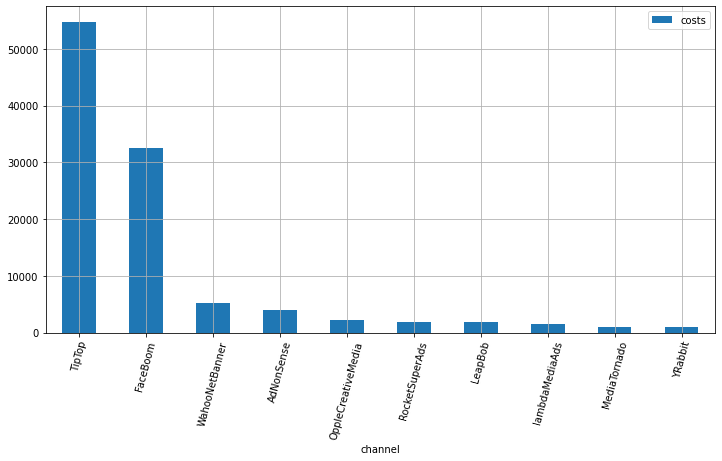

In [28]:
# построим распределение расходов на маркетинг по рекламным каналам

(
    costs_info
    .pivot_table(index='channel', values='costs', aggfunc=sum)
    .sort_values(by='costs', ascending=False)
    .plot.bar(
        grid=True,
        figsize=(12, 6),
        rot=75
    )
)

Как можем заметить, самым расходным каналом оказался `TipTop`, при условии, что тот является не самым эффективным рекламным каналом. Из всех рекламных каналов, вошедших в ТОП-3 самых эффективных, высокие денежные вложения имеет только `FaceBoom`.

<AxesSubplot:xlabel='dt'>

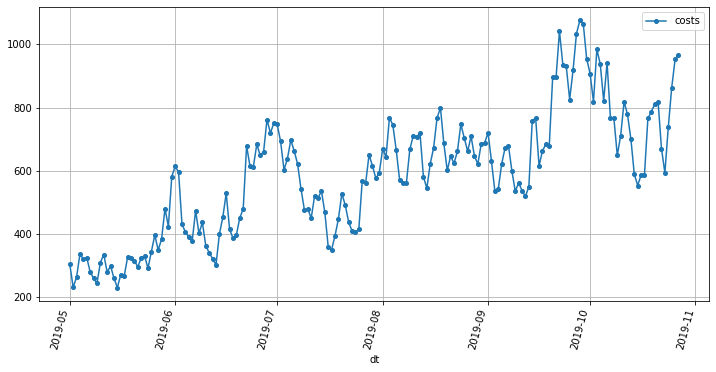

In [29]:
# строим график временной динамики расходов на маркетинг

(
    costs_info
    .pivot_table(index='dt', values='costs', aggfunc=sum)
    .sort_values(by='costs', ascending=False)
    .plot(
        style='-o',
        grid=True,
        figsize=(12, 6),
        rot=75,
        markersize = 4
    )
)

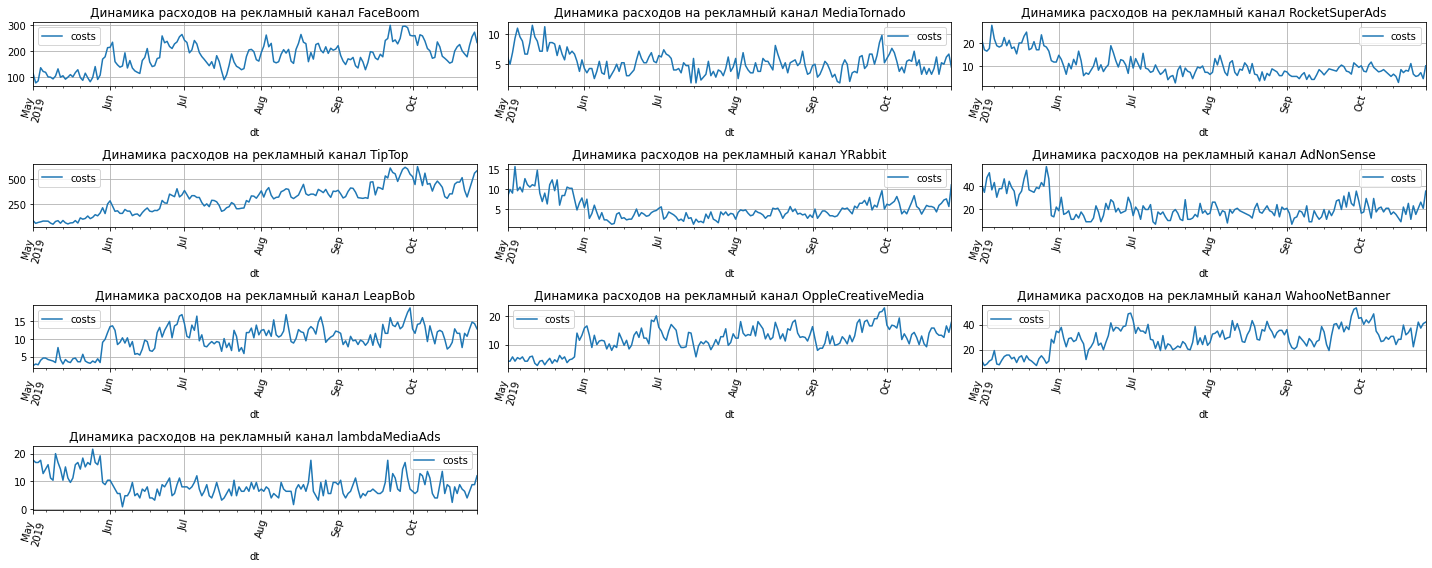

In [30]:
# строим график динамики расходов на маркетинг по времени
# для каждого рекламного канала

for i, channel in enumerate(costs_info['channel'].unique()):
    (
        costs_info
        .query('channel == @channel')
        .pivot_table(index = 'dt', values = 'costs', aggfunc = 'sum')
        .plot(
            style = '-',
            grid=True,
            figsize=(20, 8),
            rot=75,
            ax=plt.subplot(4, 3, i + 1)
        )
    )
    plt.title('Динамика расходов на рекламный канал {}'.format(channel))

plt.tight_layout()  # «подгоняем» размер графиков, чтобы уместились подписи
plt.show()

Видно, что вложения в `LambdaMediaAds` и `AdNonSense`, не смотря на их эффективность, крайне малы по сравнению с `TipTop`, который мог расходовать почти до 50 раз больше бюджета. 

Самые высокие вложения в ранее указанные рекламные канала наблюдались лишь в первый месяц наблюдаемого периода.

### Рассчет CAC

In [31]:
# посчитаем общий средний CAC для всех пользователей за весь период

print('Общий средний CAC за весь период:', profiles.query('channel != "organic"')['acquisition_cost'].mean())

Общий средний CAC за весь период: 1.1274813239427588


In [32]:
# создадим сводную таблицу со средним CAC за весь период
# с разбивкой по рекламным каналам

pivot_channel = profiles.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='mean'
)

pivot_channel

,acquisition_cost
channel,
AdNonSense,1.008054
FaceBoom,1.113286
LeapBob,0.210172
MediaTornado,0.218717
OppleCreativeMedia,0.250000
RocketSuperAds,0.412095
TipTop,2.799003
WahooNetBanner,0.602245
YRabbit,0.218975


Как можем заметить по предварительным данным из сводной таблицы, средний CAC у канала `TipTop` превышают предыдущий по стоимости более чем в 2 раза.

Ранее мы уже получили пользовательские профили с расчетом стоимости привлечения пользователя. Визуализируем данные и построим график динамики стоимости привлечения пользователей по времени.

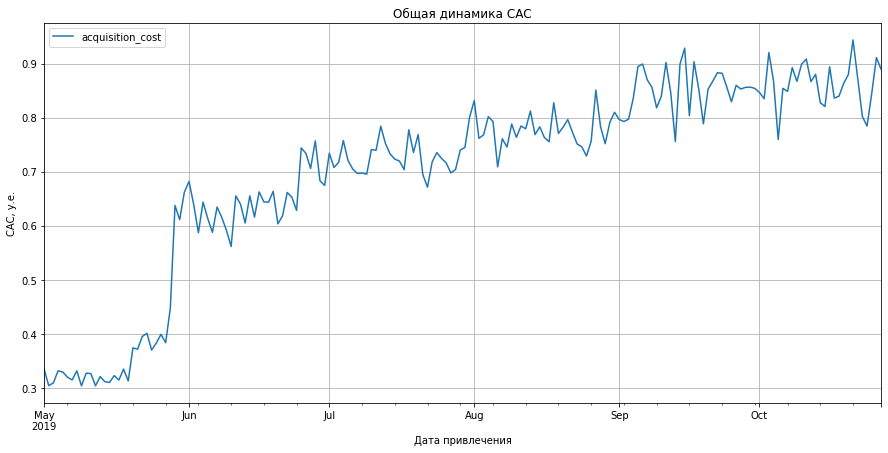

In [33]:
# строим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 7))
plt.ylabel('CAC, у.е.')
plt.xlabel('Дата привлечения')
plt.title('Общая динамика CAC')
plt.show()

Из-за вычисления общей динамики, по первому графику пробелматично сделать исчерпывающие выводы.

Пока можно лишь сказать, что при относительной стабильности в начале, с конца мая CAC принял тентенцию постоянного роста в конце или начале следующего месяца. Сделаем более наглядную динамику с разбивкой.

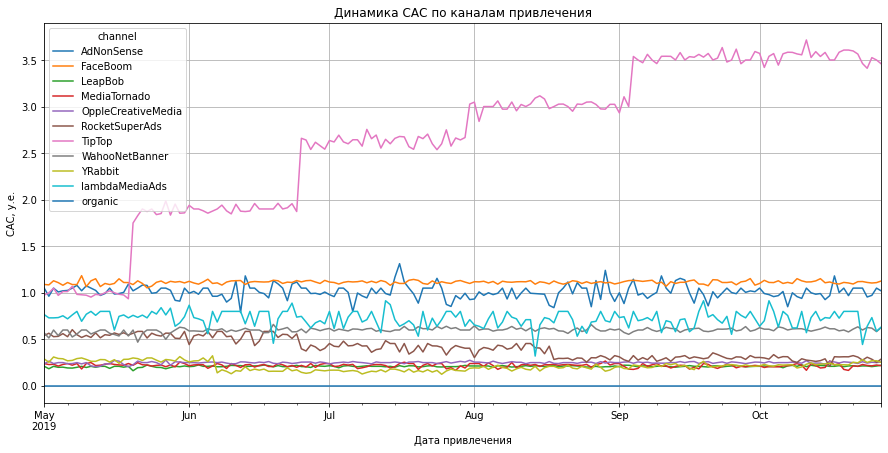

In [34]:
# строим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 7))
plt.ylabel('CAC, у.е.')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Как можем заметить, при относительной стабильности CAC у каждого источника, стоимость привлечения пользователей через `TipTop` в конце каждого месяца только росла.

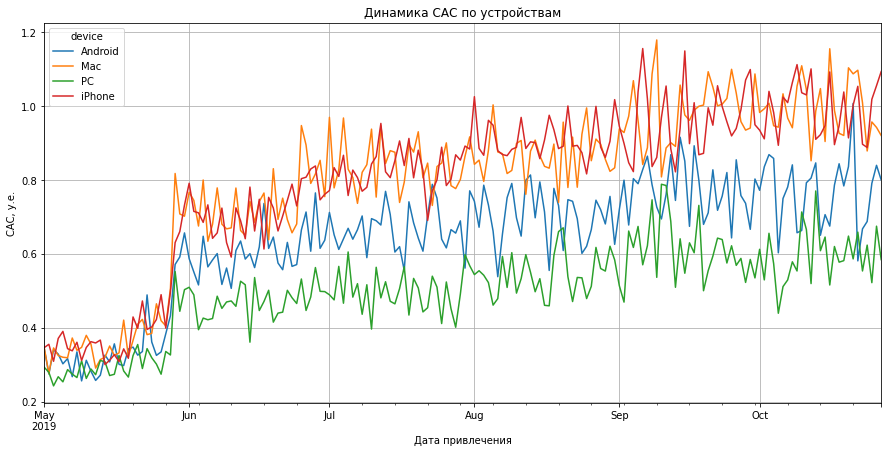

In [35]:
# строим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt', columns='device', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 7))
plt.ylabel('CAC, у.е.')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по устройствам')
plt.show()

По разбивке по устройствам можно предположить, что каждый рекламный канал таргетировался на все платформы, из-за чего можно видеть восходящую тенденцию у всех 4 платформ.

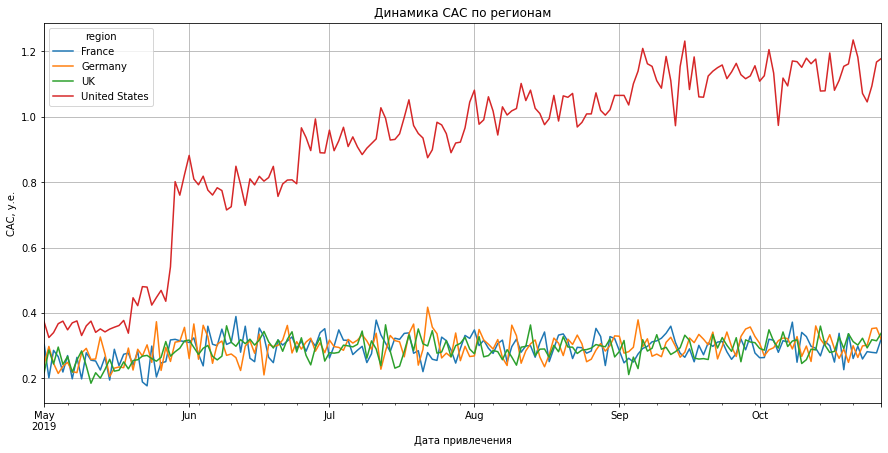

In [36]:
# строим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt', columns='region', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 7))
plt.ylabel('CAC, у.е.')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по регионам')
plt.show()

При нисходящей динамики с конца мая у остальных регионов, мы можем заметить обратно прапорциональную динамику у американского региона, что могло послужить неэффективностью рекламтных кампаний.

### Вывод

Подводя предварительные итоги, можно предположить, что основными причинами неэффективности рекламных кампаний приложения послужила резкая восходящая динамика CAC на `американский сектор` и `TipTop` с конца мая.

## Оценим окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

Опишем проблемы, которые мы обнаружили. Ответим на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишем возможные причины обнаруженных проблем и сформируем рекомендации для рекламного отдела. При решении этого шага считаем, что мы смотрите данные 1-го ноября 2019 года и что в нашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируем общую окупаемость рекламы

Для отображения полной информации и лучшей визуализации, предварительно зададим функции:

In [37]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [38]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Поскольку органический трафик не требует каких-либо расходов на маркетинг и может в дальнейшем повлиять на корректность данных, сразу исключим органически привлечённых пользователей из исследуемых данных.

In [39]:
# для дальнейшей работы с данными, сразу исключим органических пользователей
# а зачем с помощью фнукции get_ltv() получим данные 
# с моментом анализа на 1 ноября 2019 года
# и горизонтом анализа в 14 дней

profiles = profiles.query('channel != "organic"') 

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders_info, datetime(2019, 11, 1).date(), 14, dimensions=[]
)

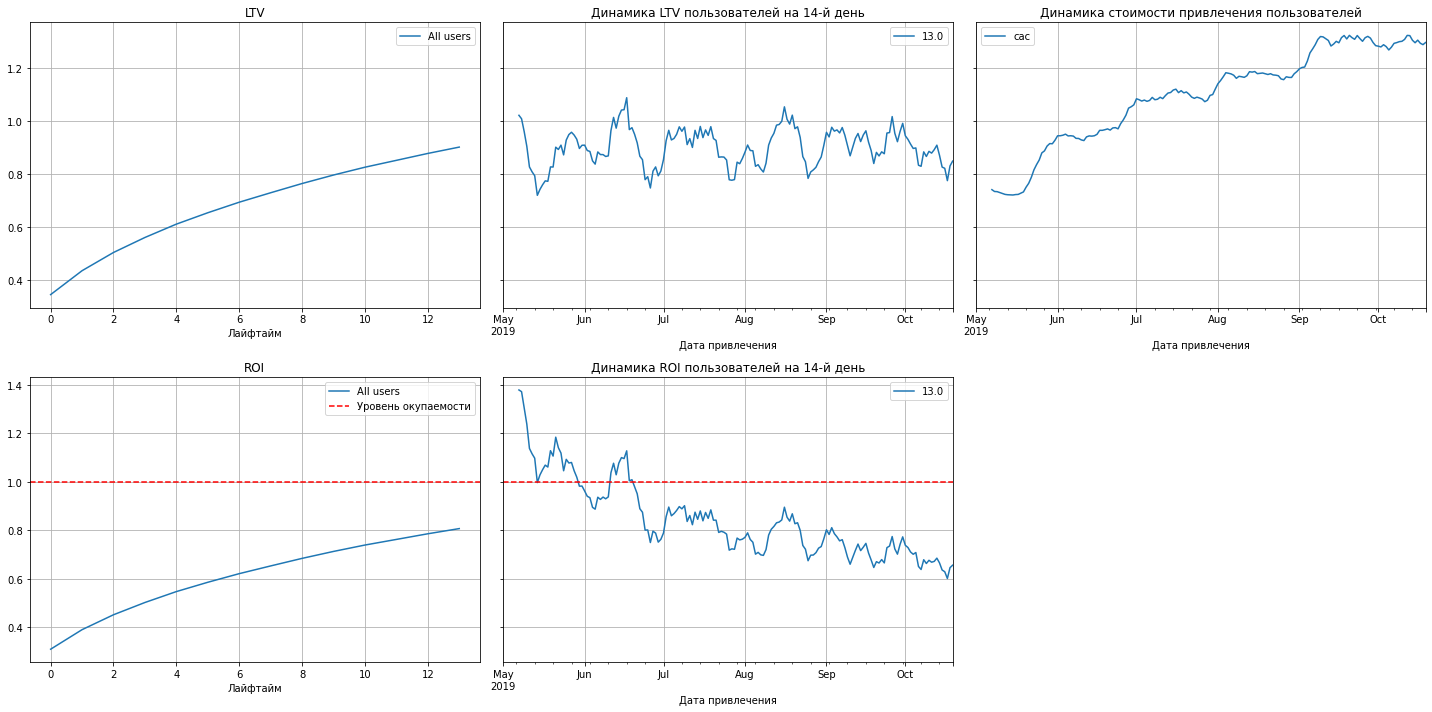

In [40]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Как может наблюдать по общим показателям, уже в середине июня рекламная кампания перестала окупаться и с каждым месяцем уходила всё в бОльший минус. 

По кривой ROI можно сказать, что в среднем каждая рекламная кампания уходила в минус на `20%`. А по динамики CAC можно сказать, что с каждым месяцем стоимость привлечения пользователей только росла.

### Проанализируем окупаемость рекламы с разбивкой по устройствам

In [41]:
# рассчитываем LTV и ROI
# с формированием когорт по устройствам

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders_info, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)


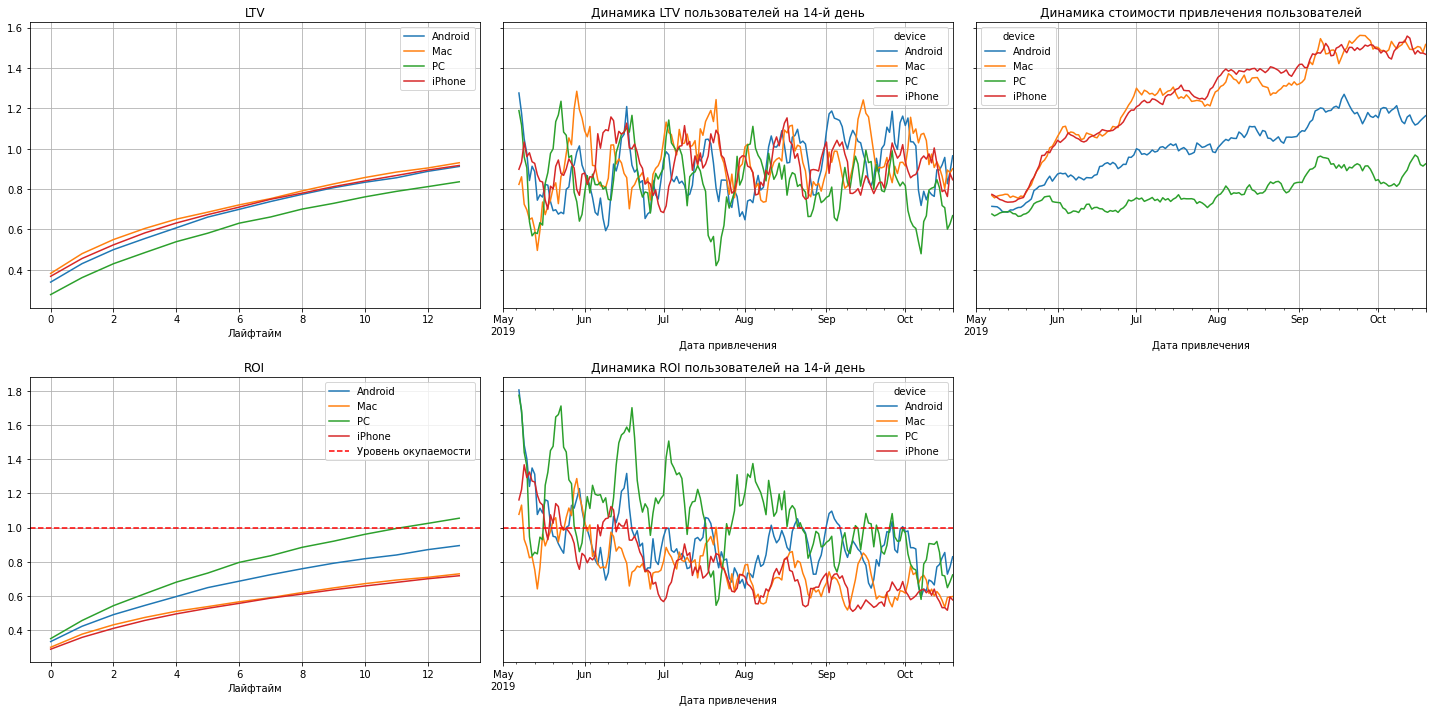

In [42]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Судя по кривой ROI рекламные кампании на всех устройствах, кроме `PC`, в среднем, были убыточны. Однако, судя по динамике, начиная с середины августа и эта платформа начала уходить в убыток.

### Проанализируем окупаемость рекламы с разбивкой по странам

In [43]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders_info, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

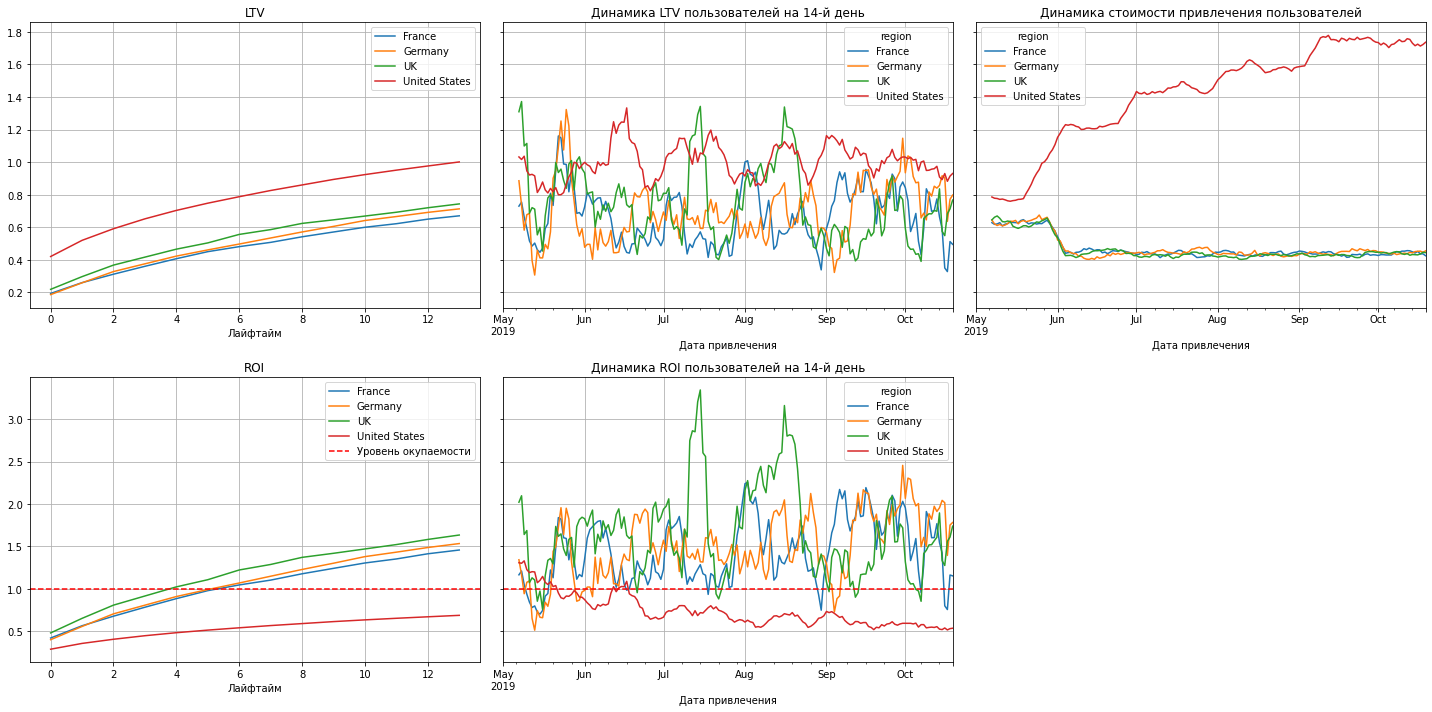

In [44]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Судя по графику можно сказать, что показатели по американскому сектору можно принять за аномальные выбросы, поскольку именно этот регион выбивается из общей картины.

Можно предположить, что именно возросший CAC американского сектора стал причиной выхода рекламных кампаний в минус. В среднем, по этому секторы, кампании уходили в минус на `30%`.

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам

In [45]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders_info, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

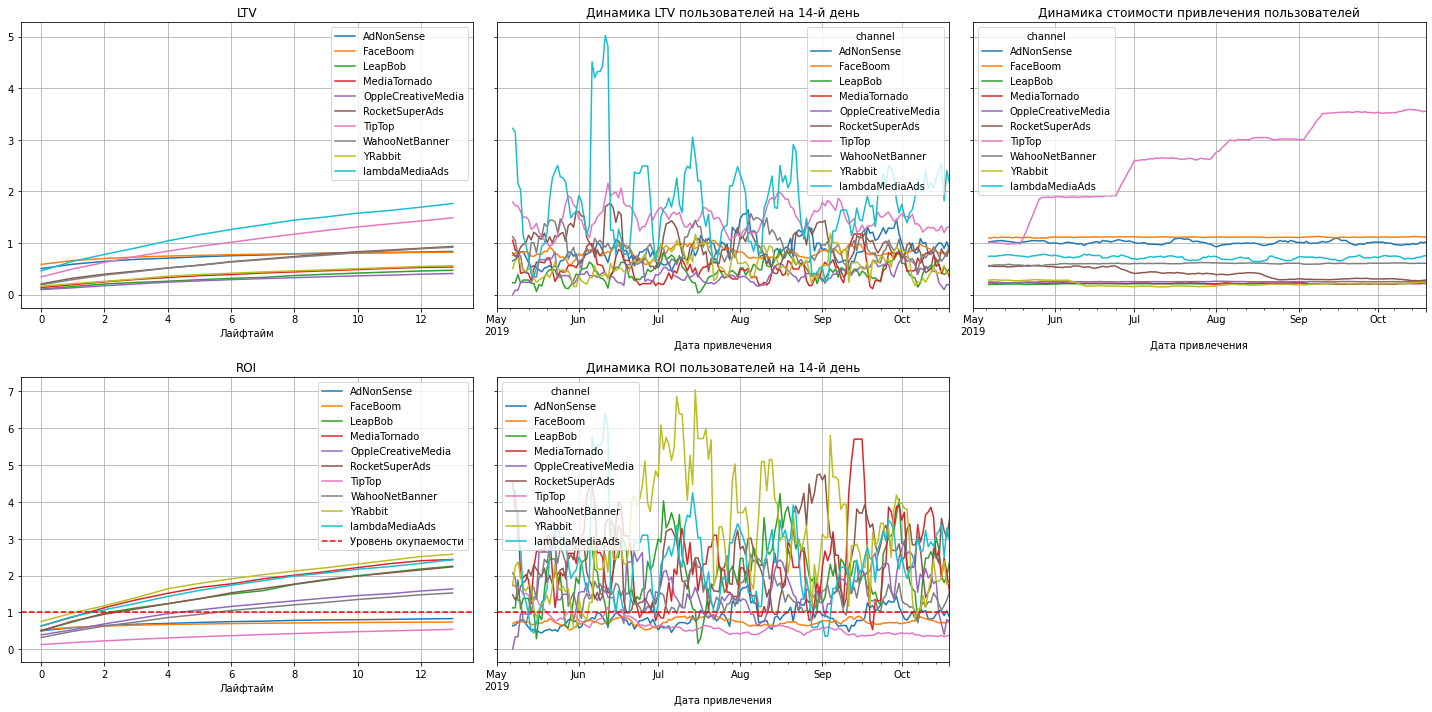

In [46]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

2 из 3 лучших ( `AdNonSence` и `FaceBoom` ) по удержанию рекламных канала оказались убыточны. 

Помимо этого, при относительной стабильности CAC остальных рекламных каналов, у `TipTop` можно заметить восходящую динамику. Учитывая расходы на этот канал, можно предположить, что он так же стал причиной убыточности рекламных кампаний.

### Анализ конверсии и удержания

#### Анализ конверсии и удержания с разбивкой по устройствам

In [47]:
# получаем данные о конверсии и удержании с разбивкой по устройствам

conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders_info, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

retention_raw, retention = get_retention(
    profiles, visits_info, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

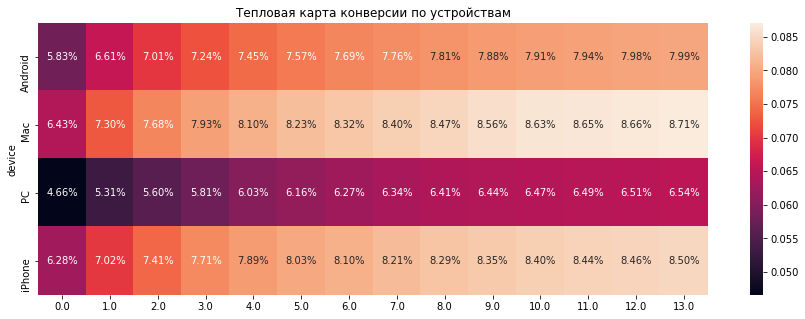

In [48]:
# визуализируем данные о конверсии с помощью тепловой карты

plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по устройствам')
plt.show() 

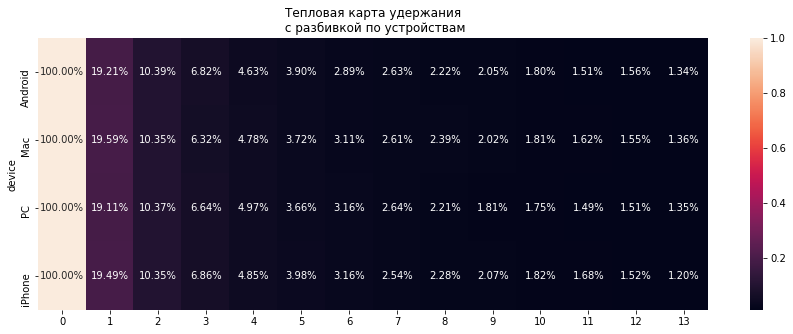

In [49]:
# визуализируем данные об удержании с помощью тепловой карты

plt.figure(figsize=(15, 5))
sns.heatmap(retention.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта удержания\n с разбивкой по устройствам')
plt.show()  

Как можем видеть, конверсия по всем устройствам, в среднем, развивается лишь на `2%` с нулевого лайфтайма. Уже на 4 день процент удержания составляет менее `5%`.

Выбросы при разбивки по устройствам, позволяющие как-то выделить отдельную когорту, отсутствуют.

#### Анализ конверсии и удержания с разбивкой по странам

In [50]:
# получаем данные о конверсии и удержании с разбивкой по регионам

conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders_info, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

retention_raw, retention = get_retention(
    profiles, visits_info, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

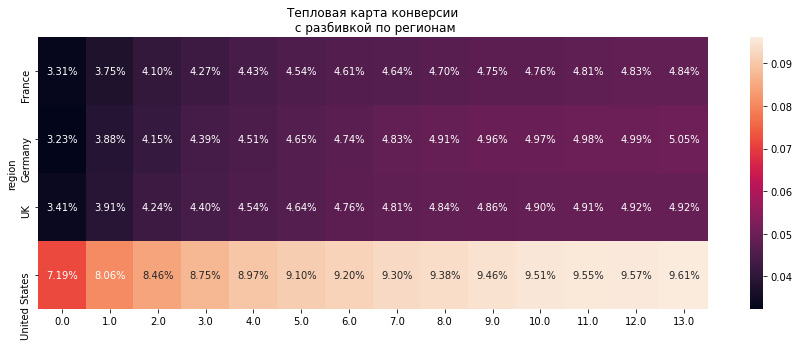

In [51]:
# визуализируем данные о конверсии с помощью тепловой карты

plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии\n с разбивкой по регионам')
plt.show()    

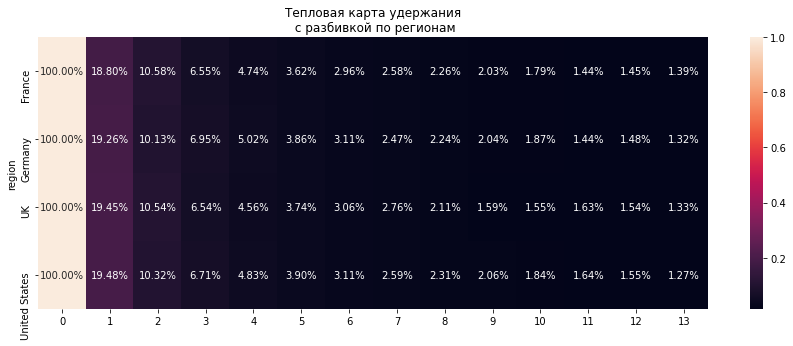

In [52]:
# визуализируем данные об удержании с помощью тепловой карты

plt.figure(figsize=(15, 5))
sns.heatmap(retention.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта удержания\n с разбивкой по регионам')
plt.show()  

На тепловой карте конверсии выделяется американский сектор, который перегоняет в первый день остальные в 2 раза. Однако на карте удержания имеет предрасположенность с общей тенденции спада.

Стоит выдвинуть предположение, что при достаточной платежеспосожности американского сектора, у приложения имеются проблемы с удержанием клиентов.

#### Анализ конверсии и удержания с разбивкой по рекламным каналам

In [53]:
# получаем данные о конверсии и удержании с разбивкой по рекламным каналам

conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders_info, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

retention_raw, retention = get_retention(
    profiles, visits_info, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

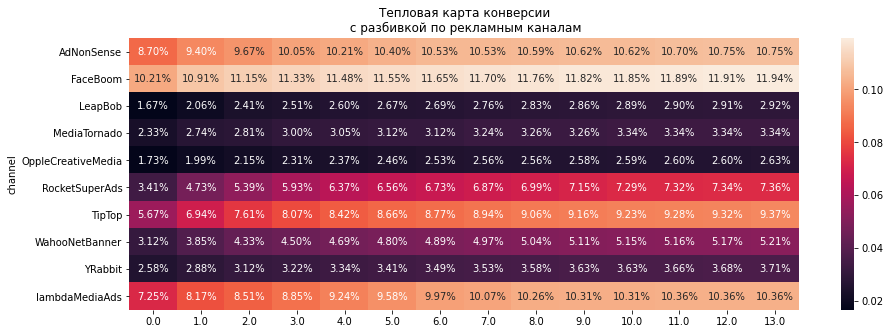

In [54]:
# визуализируем данные о конверсии с помощью тепловой карты

plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии\n с разбивкой по рекламным каналам')
plt.show()            

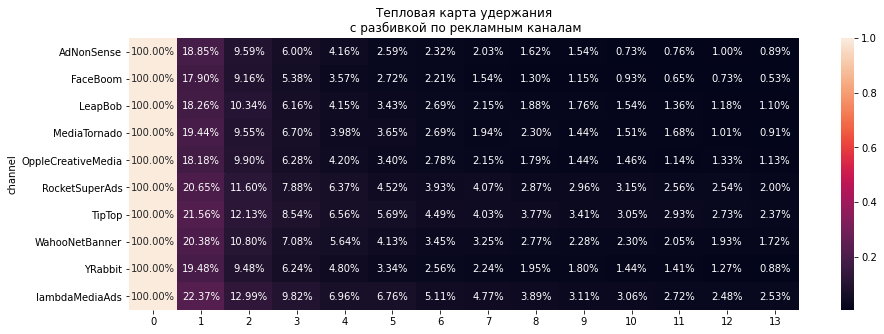

In [55]:
# визуализируем данные об удержании с помощью тепловой карты

plt.figure(figsize=(15, 5))
sns.heatmap(retention.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта удержания\n с разбивкой по рекламным каналам')
plt.show()  

Имея изначально хорошую конверсию, `FaceBoom` демонстрируют крайне низкий её прогресс. Не смотря на убыточность рекламного канала `TipTop`, он показывает хорошие показатели как конверсии, так и удержания.

По части удержания лучшими каналами вышли - `TipTop` и `lambdaMediaAds`.

## Напишем выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

**Причины:**

Основными причинами неэффективности рекламных кампаний можно предположительно считать аномальный `рост CAC американского сектора` и `рост CAC рекламного канала "TipTop"`. При остальных равных показателях динамики, стоимость привлечения пользователей этих когор имел тенденцию к ежемесячному росту, начиная с июня.

Стоит выделить, что при разбивке по регионам, все остальные секторы, кроме американского, можно считать относительно успешными, с положительным показателем ROI. Это же можно сказать про рекламные каналы, кроме `FaceBoom`, `TipTop` и `AdNonSence`.

**Рекомендации:**

* В первую очередь, провести корректировку и снижение расходов на рекламу в отношение `американского сектора` пользователей и рекламного канала `TipTop`.
* Так же снизить расходы на такие рекламные каналы, как: `FaceBoom` и `AdNonSence`
* Восстановить расходы на уровень майских кампаний в отношение остальных регионов.
* Проработать проблему с недостаточным удержанием пользователей по всем секторам